<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>

In [23]:
# Tratamiento de datos
import numpy as np
import pandas as pd
#import sidetable as stb

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import sidetable as stb
import pylab as py

# Asunciones y Preprocesamiento
from scipy import stats
import math
from scipy.stats import levene
#import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools
#from statsmodels.tools.tools import add_constant
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# ANOVA
#import statsmodels.api as sm
#from statsmodels.formula.api import ols
#import researchpy as rp # chi square

#Linear Regresion con Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = False

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import cohen_kappa_score


# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

#various
import random
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [16]:
np.random.seed(0)

In [19]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

We display the randomly data that we generated in a scatter plot

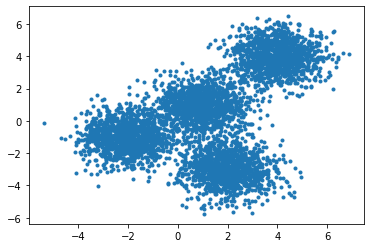

In [21]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

We set up the K-Means choosing the parameters 'k-means++', 4 and 12.

In [24]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Fit the KMeans model with the feature matrix we created above, X

In [26]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b>.

In [27]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 3, 3, ..., 0, 1, 1])

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster_centers\_ </b> and save it as <b> k_means_cluster_centers </b>.

In [28]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3.97334234,  3.98758687],
       [-2.03556986, -0.99814034],
       [ 0.96876422,  0.9819131 ],
       [ 1.99982936, -3.01938591]])

Let's go to create the visual plot!

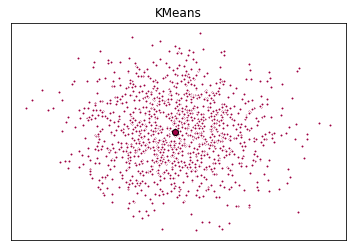

In [31]:
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]

    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
    
    ax.set_title('KMeans')
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()

Our dataset about Wines

In [2]:
wines = pd.read_csv("wine-clustering.csv")

In [3]:
wines.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wines.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [5]:
wines.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [6]:
wines.shape

(178, 13)

In [7]:
wines_nulls = pd.DataFrame(wines.isnull().sum()*100 / len(wines))
wines_nulls

,0
Alcohol,0.0
Malic_Acid,0.0
Ash,0.0
Ash_Alcanity,0.0
Magnesium,0.0
Total_Phenols,0.0
Flavanoids,0.0
Nonflavanoid_Phenols,0.0
Proanthocyanins,0.0
Color_Intensity,0.0


In [8]:
wines_duplicates = wines.duplicated().sum()*100 / len(wines)
wines_duplicates

0.0

**EDA**

In [9]:
wines.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Exploring outliers

In [10]:
wines_cols = wines.columns.to_list()

def outliers(wines_cols, wines):

    dict_outliers = {}
    for col in wines_cols:
        
        q1 = np.percentile(wines[col],25) #calculate quartiles
        q3 = np.percentile(wines[col],75)

        iqr = q3 - q1 #calculate interquartile range

        outliers_sep = iqr * 1.5 # Calculate the whiskers of the box plot

        outliers_data = wines[(wines[col] < q1 - outliers_sep) | (wines[col] > q3 + outliers_sep)] #filtering our data to know what specifics values are outliers

        if outliers_data.shape[0] > 0:
            dict_outliers[col] = list(outliers_data.index)
    
    return dict_outliers

In [11]:
index = outliers(wines_cols, wines)
index

{'Malic_Acid': [123, 137, 173],
 'Ash': [25, 59, 121],
 'Ash_Alcanity': [59, 73, 121, 127],
 'Magnesium': [69, 73, 78, 95],
 'Proanthocyanins': [95, 110],
 'Color_Intensity': [151, 158, 159, 166],
 'Hue': [115]}

In [12]:
index.items()

dict_items([('Malic_Acid', [123, 137, 173]), ('Ash', [25, 59, 121]), ('Ash_Alcanity', [59, 73, 121, 127]), ('Magnesium', [69, 73, 78, 95]), ('Proanthocyanins', [95, 110]), ('Color_Intensity', [151, 158, 159, 166]), ('Hue', [115])])

# Clustering

Unsupervised clustering in mutually exclusive groups (example: clients segmentation)

Difference between clustering and classification: 
- Classification predicts categorical classed labels
- Clustering make groups with similar characteristics